![Texte alternatif](IM1.png)


![Texte alternatif](IM2.png)


![Texte alternatif](IM3.png)


![Texte alternatif](IM4.png)


![Texte alternatif](IM5.png)


![Texte alternatif](IM6.png)


#  <div align="center"> <span style="color:#1A489B"> <h2> Data understanding </h2></span></div>


<h3 style="color: dodgerblue;">User attributes:</h3>

- Gender: the gender
- Age: 21, 46, 26, 31, 41, 50plus, 36, below21
- Maritalstatus: marital or relationship status (a person can be in a relationship without being married)
- Education: the driver's level of education
- Occupation: professional status or the sector of activity if the person is employed
- Incomes: salary or income, considering the average salaries in the company, we can assume that income is defined per year
- Car: the type of car the person drives
- Has_children: binary variable, whether the person has children or not, here less than 50% of the population does not have children. The dataset is balanced from the dataset's perspective
- Bar: the number of times per month the driver goes to a bar
- Coffeehouse: the number of times per month the person goes to a coffee shop

- RestaurantLessThan20: the average number of times per month the person goes to a restaurant with an average spending of less than $20 per person

- Restaurant20To50: the average number of times per month the person goes to a restaurant with an average spending of $20 to $50 per person

<h3 style="color: dodgerblue;">Contextual attributes:</h3>

- Destination: the place the driver wants to reach. The destination of the drive can influence the driver's behavior; a person returning home (if there is no emergency) will be less rushed or stressed than a person heading to work.
- Passenger: the driver's company situation. The driver can be alone, accompanied by their partner, friends, or children if they have any.
- Weather: the current weather, which can be sunny, rainy, or snowy
- Time: the current time
- Temperature: the minimum temperature value is 30. However, there is no information about the unit (Celsius, Fahrenheit, etc.).
- toCoupon_GEQ5min: a binary variable defining whether or not the person drove more than 5 minutes to a bar/restaurant to use the coupon. Here, both the minimum and maximum are equal to 1, so the entire dataset answered "yes."
- toCoupon_GEQ15min: a binary variable defining whether or not the person drove more than 15 minutes to a bar/restaurant to use the coupon.
- toCoupon_GEQ25min: a binary variable defining whether or not the person drove more than 25 minutes to a bar/restaurant to use the coupon.
- direction_same: a binary variable defining whether the person's current direction is towards the restaurant or the bar.
- direction_opp: a binary variable defining whether the person's current direction is towards the restaurant or the bar.

<h3 style="color:dodgerblue;">Coupon attributes:</h3>

- Coupon: the offer provided on the coupon, it can be a coupon for less than $20, $50 to spend in a restaurant, in a cafe, in a bar, or for a takeout service
- Expiration: coupon validity duration

<h3 style="color: dodgerblue;">Target attribute:</h3>

- Y: the person's choice, whether they accept the coupon or not


<h3 style="color:blue;"> Features types:</h3>


| <span style="color:#DE3163 ">*Nominal Features*</span>   |     | <span style="color: #DE3163">*Ordinal Features* </span>   |
|--------------------------------------------------------- |     |-----------------------------------------------------------|
| <span style="color:blu">**destination**</span>           |     |  <span style="color:blu">**Restaurant20To50**</span>                                     |
| <span style="color:bue">**passenger**</span>             |     | <span style="color:orang">**RestaurantLessThan20**</span> |
| <span style="color:ble">**weather**</span>               |     | <span style="color:orang">**CarryAway**</span>            |
| <span style="color:blu">**time**</span>                  |     | <span style="color:orang">**age**</span>                  |
| <span style="color:bue">**coupon**</span>                |     | <span style="color:ornge">**Bar**</span>                  |
| <span style="color:bue">**expiration**</span>            |     | <span style="color:ornge">**income**</span>               |
| <span style="color:ble">**gender**</span>                |     |                                                           |
| <span style="color:bue">**maritalStatus**</span>         |     |                                                           |
| <span style="color:bue">**occupation**</span>            |     |                                                           |
| <span style="color:bue">**education**</span>             |     |                                                           |


# <div align="center"><span style="color:#1A489B"> <h2> Data Exploration </h2></span></div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# bib de systeme 
from tqdm import tqdm
import sys
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('CouponRecommendation.csv')


In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.shape

(12684, 26)

In [5]:
#statistique des variables quantitatives 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


In [6]:
# Types des features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Check uniques values and types 


In [7]:
values=[]
feature_types=[]
for Un in data.columns:
    values.append(data[Un].unique())
    feature_type = data[Un].dtype
    feature_types.append(str(feature_type))
d={'features': data.columns, 'unique values': values,'Types':feature_types}
features=pd.DataFrame(data=d)
features

,features,unique values,Types
0,destination,"[No Urgent Place, Home, Work]",object
1,passanger,"[Alone, Friend(s), Kid(s), Partner]",object
2,weather,"[Sunny, Rainy, Snowy]",object
3,temperature,"[55, 80, 30]",int64
4,time,"[2PM, 10AM, 6PM, 7AM, 10PM]",object
5,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta...",object
6,expiration,"[1d, 2h]",object
7,gender,"[Female, Male]",object
8,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]",object
9,maritalStatus,"[Unmarried partner, Single, Married partner, D...",object


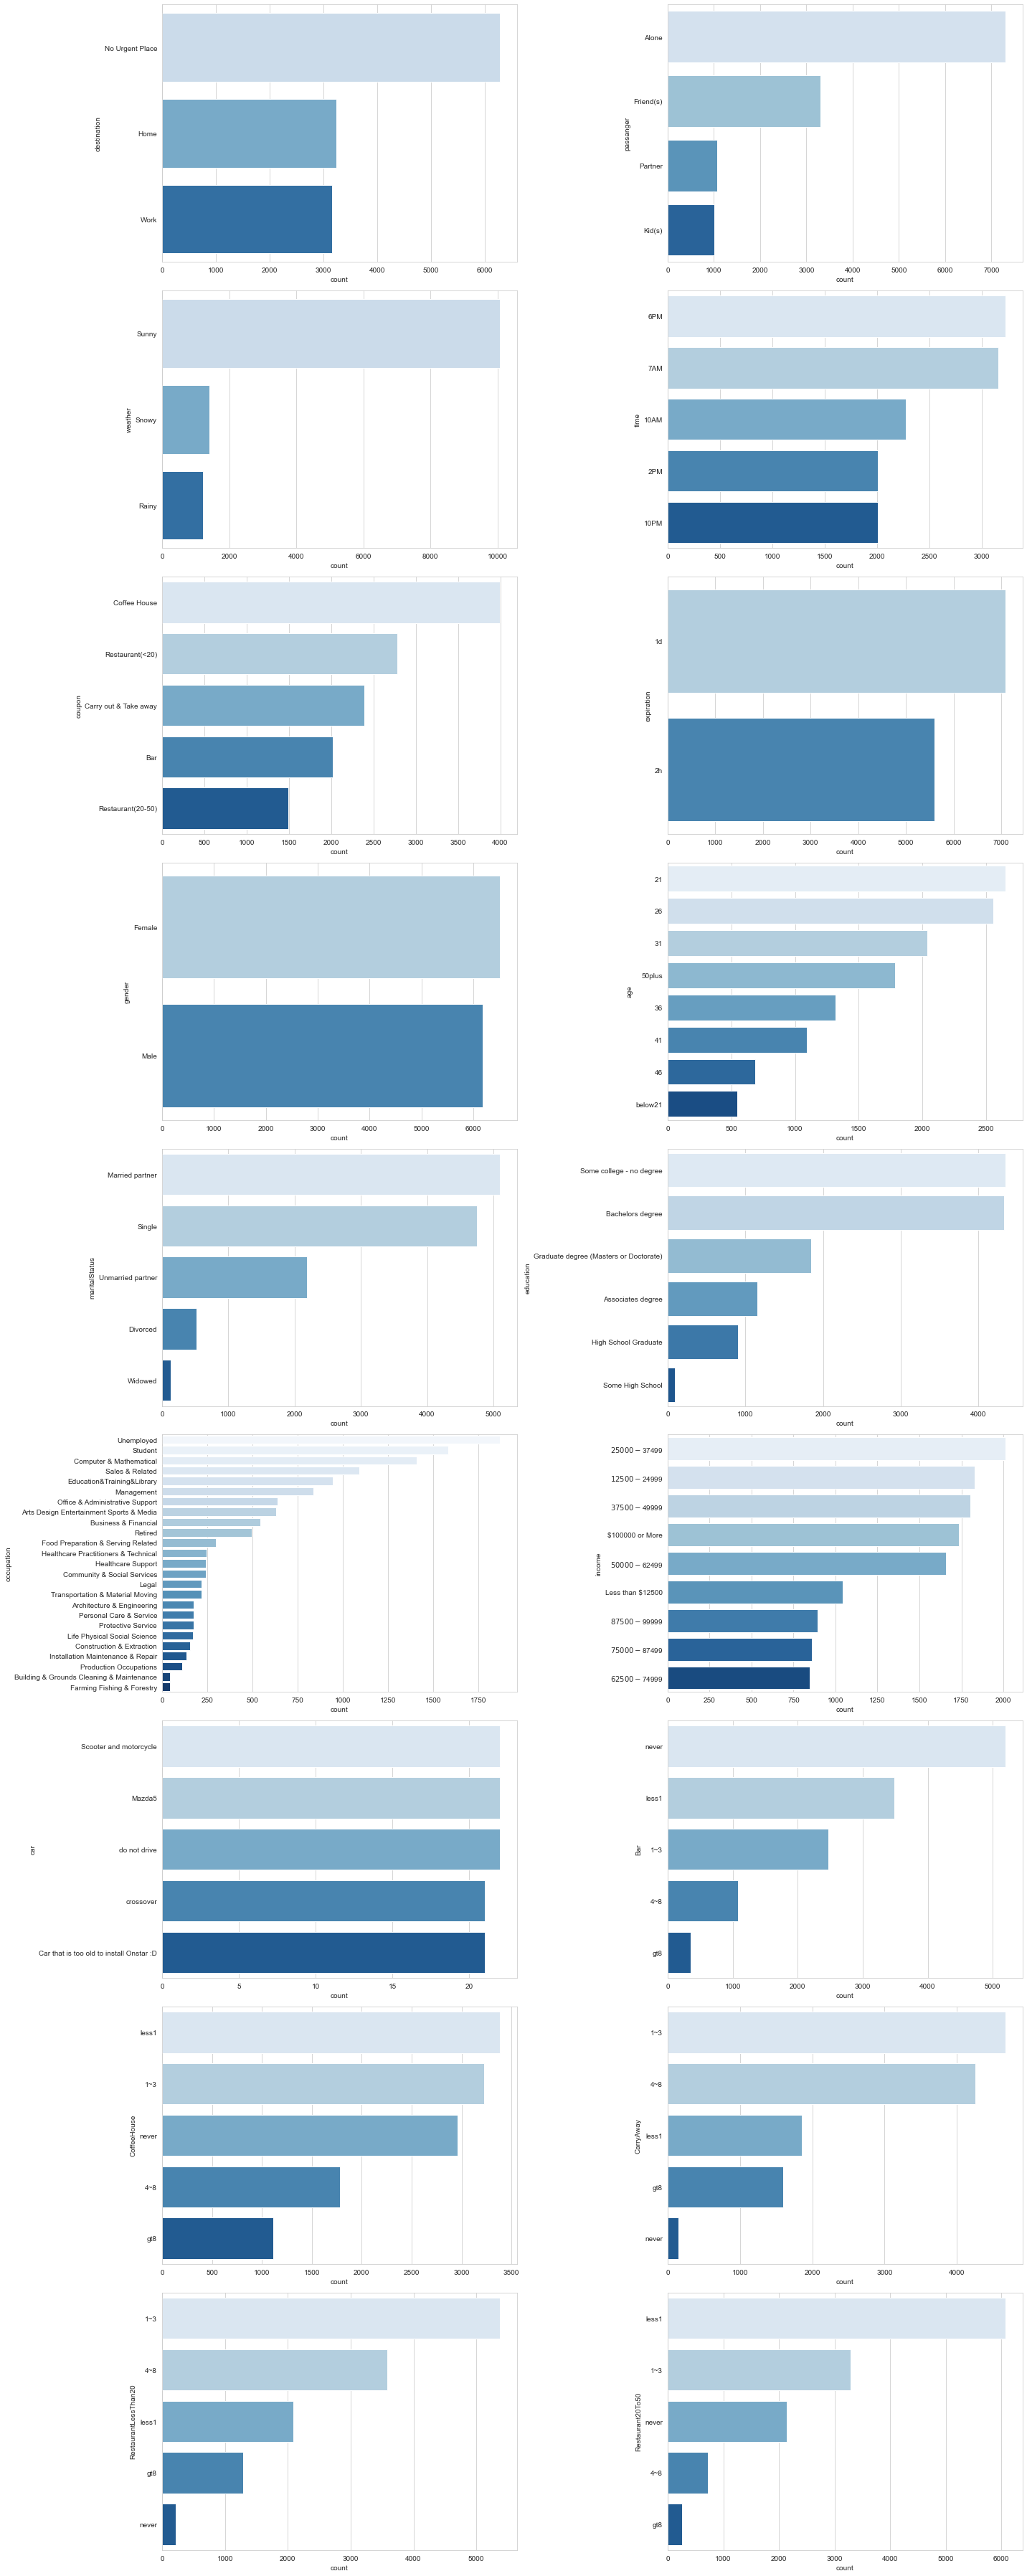

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(9, 2, figsize=(20, 50))
axes = axes.flatten()

for ax, col in zip(axes, data.select_dtypes('object').columns):
    sns.countplot(y=col, data=data, ax=ax, 
                  palette="Blues",  # Utilise la palette de couleurs "Blues"
                  order=data[col].value_counts().index)

plt.tight_layout()
plt.show()



#  <div align="center"> <span style="color:#1A489B"> <h2> Data visualization </h2></span></div>


## <span style="color:blue"> Univariate Analysis </span></div>


In [9]:
def univariate_analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name).Y.count())
    df_EDA['Accepted'] = list(data[data.Y==1].groupby(column_name).Y.count())
    df_EDA['Rejected'] = list(data[data.Y==0].groupby(column_name).Y.count())
    df_EDA['%Accepted'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%Rejected'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise accepted coupons')
    plt.show()

    return df_EDA

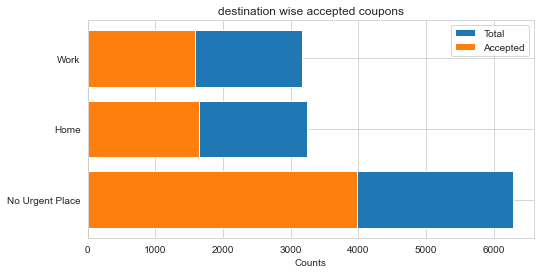

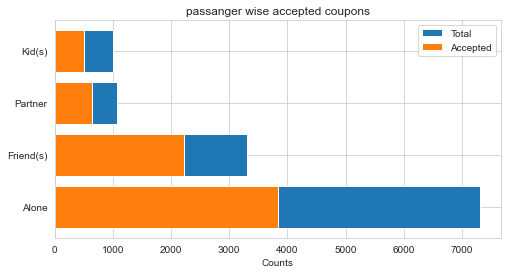

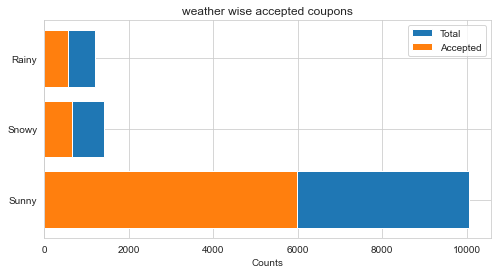

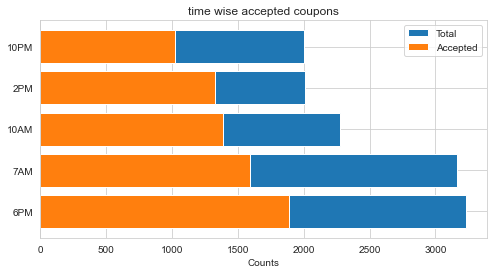

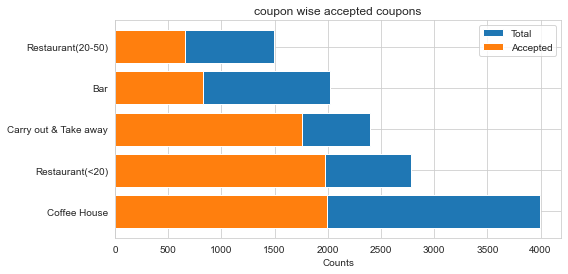

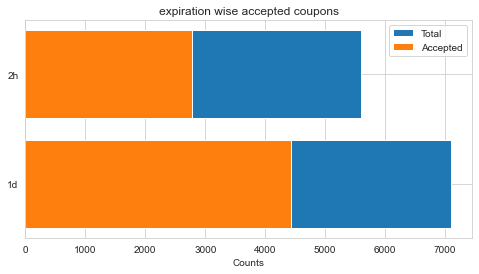

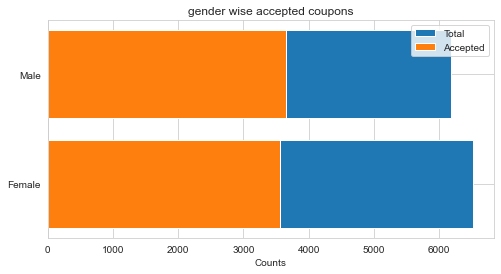

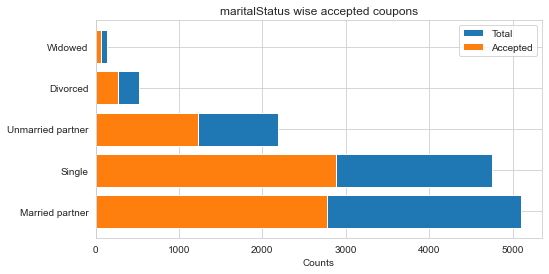

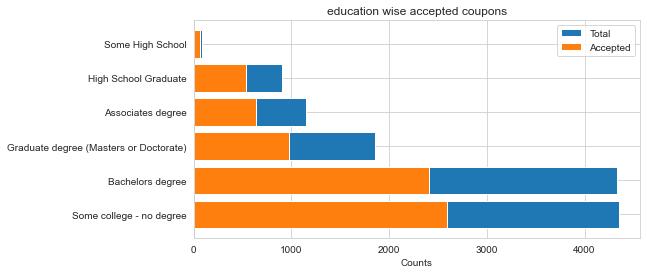

In [10]:
# Create frequency tables for categorical attributes
categorical_attributes = ['destination', 'passanger', 'weather', 'time',
                          'coupon', 'expiration', 'gender', 'maritalStatus',
                          'education']

for att in categorical_attributes:
    univariate_analysis(att)

## Graphs description

* **destination** People that has no urgent place to go has a higher probability to accept the coupon.
* **passenger** If the driver has friends with him or when he is alone is likely to accept the coupon.
* **weather** People tend to accept the coupon when it is sunny.
* **time** If the time is too early or too late, the probability of accepting the coupon is lower.
* **coupon** If the coupon is of a coffee house, the probability of accepting the coupon is just the same as rejecting it. If the coupon is of a cheap restaurant or carry out, most people will accept the coupon. If the coupon is of a Bar of expensive Restaurant, people tend to refuse it.
* **expiration** People are more likely to accept a coupon that expires in one day than one in two hours.
* **gender** There is no much difference between gender.
* **maritalStatus** Single people are most likely to accept the coupon.
* **education** Some college, Bachelor or high school graduate are more likely to accept the coupon.

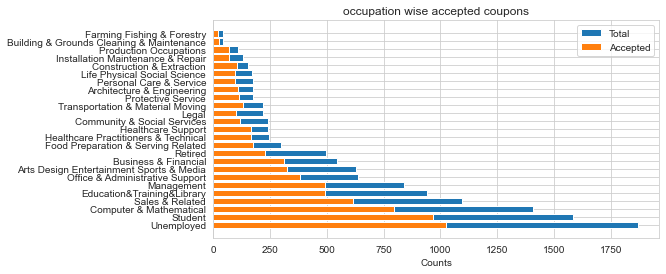

,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
24,Unemployed,1870,1025,845,54.813,45.187
22,Student,1584,967,617,61.048,38.952
5,Computer & Mathematical,1408,798,610,56.676,43.324
21,Sales & Related,1093,615,478,56.267,43.733
7,Education&Training&Library,943,494,449,52.386,47.614
15,Management,838,493,345,58.831,41.169
16,Office & Administrative Support,639,384,255,60.094,39.906
1,Arts Design Entertainment Sports & Media,629,326,303,51.828,48.172
3,Business & Financial,544,310,234,56.985,43.015
20,Retired,495,227,268,45.859,54.141


In [11]:
univariate_analysis('occupation')

**Observations**:
Most users in this data are Unemployed and Student.
Users who are students have more coupon acceptance ratio than Unemployed users.
Users who have occupation Healthcare Support and Construction & Extraction accept more coupons than others.

In [12]:
def uni_ordinal(column_name):
    # Calculate the required statistics
    total_counts = data[column_name].value_counts()
    accepted_counts = data[data['Y'] == 1][column_name].value_counts()
    
    # Calculate the percentage of accepted coupons
    percentage_accepted = (accepted_counts / total_counts) * 100

    # Create a sorted DataFrame
    df_EDA = pd.DataFrame({
        column_name: total_counts.index,
        'Total_Count': total_counts.values,
        'Accepted': accepted_counts.values,
        '%Accepted': percentage_accepted
    })
    
    # Sort the DataFrame by 'Total_Count' in descending order
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)

    # Create and display the horizontal bar chart
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(df_EDA[column_name], df_EDA['Total_Count'])
    ax.barh(df_EDA[column_name], df_EDA['Accepted'])
    ax.legend(labels=['Total', 'Accepted'])
    ax.set_xlabel('Counts')
    ax.set_title(column_name + ' wise accepted coupons')
    plt.show()

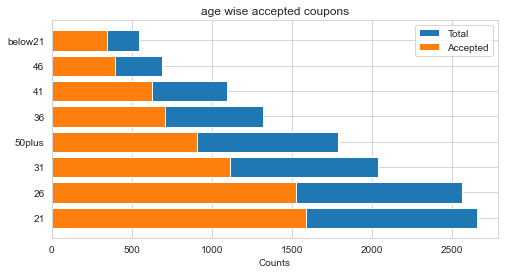

In [13]:
uni_ordinal('age')

**Observations**:
Also, users whose age between 21 and 26 have the highest coupon acceptance ratio whereas users whose age is above 50 years have the highest coupon rejection ratio.

<Figure size 720x432 with 0 Axes>

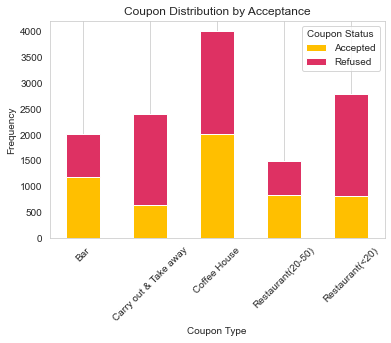

In [14]:
# Group the data by 'coupon' and 'Y' (accepted or refused)
coupon_distribution = data.groupby(['coupon', 'Y']).size().unstack()

# Create a bar chart for the coupon distribution
plt.figure(figsize=(10, 6))
coupon_distribution.plot(kind='bar', stacked=True, color=['#FFBF00', '#DE3163'])
plt.title('Coupon Distribution by Acceptance')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Coupon Status', labels=['Accepted', 'Refused'])
plt.grid(axis='y')

plt.show()

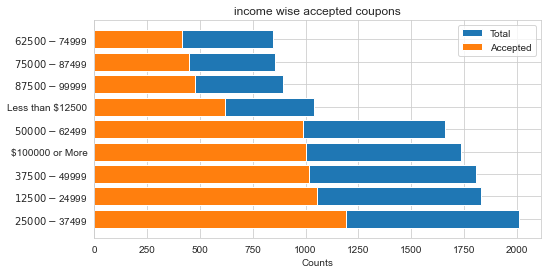

In [15]:
uni_ordinal('income')

Users who have low income and high income accept more coupons than others.
Users who have medium-range income are mostly rejecting the coupon.

# <span style="color:blue"> Bivariante Analysis </span>



<Figure size 864x576 with 0 Axes>

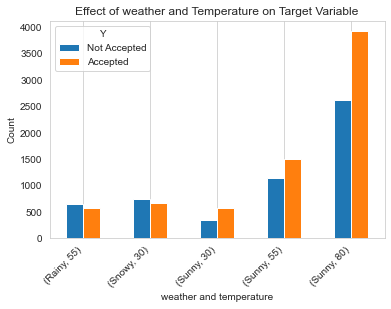

In [16]:
passenger_destination_counts = data.groupby(['weather', 'temperature', 'Y']).size().unstack(fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
passenger_destination_counts.plot(kind='bar', stacked=False)
plt.title('Effect of weather and Temperature on Target Variable')
plt.xlabel('weather and temperature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Y', labels=['Not Accepted', 'Accepted'])
plt.grid(axis='y')

plt.show()


**observation**:
When the weather is sunny people will most likely accept the coupon.

<Figure size 864x576 with 0 Axes>

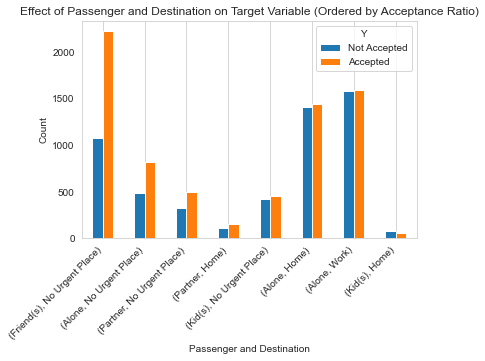

In [17]:
# Replace 'Passenger', 'Destination', and 'Target' with your actual column names
passenger_destination_counts = data.groupby(['passanger', 'destination', 'Y']).size().unstack(fill_value=0)

# Calculate the acceptance ratio for each combination
passenger_destination_counts['Acceptance Ratio'] = passenger_destination_counts[1] / (passenger_destination_counts[0] + passenger_destination_counts[1])

# Sort the combinations by acceptance ratio in descending order
passenger_destination_counts = passenger_destination_counts.sort_values(by='Acceptance Ratio', ascending=False)

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
passenger_destination_counts.drop(columns='Acceptance Ratio').plot(kind='bar', stacked=False)
plt.title('Effect of Passenger and Destination on Target Variable (Ordered by Acceptance Ratio)')
plt.xlabel('Passenger and Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Y', labels=['Not Accepted', 'Accepted'])
plt.grid(axis='y')

plt.show()

**observation**:
When people are with Friends and have no urgent place to go, they will most likely accept the coupon.

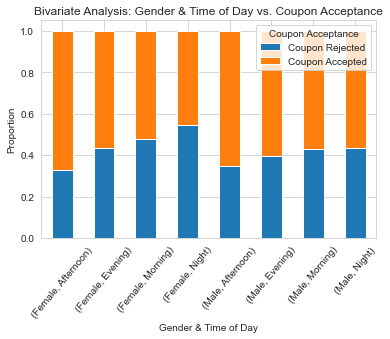

In [18]:
# Create a function to categorize "time" into "morning," "evening," and "night"
def categorize_time(row):
    if row['time'] in ['6AM', '7AM', '10AM']:
        return 'Morning'
    elif row['time'] in ['2PM']:
        return 'Afternoon'
    elif row['time'] in ['10PM']:
        return 'Night'
    else:
        return 'Evening'
data_copy = data.copy()

# Apply the categorization function to create a new column
data_copy['time'] = data_copy.apply(categorize_time, axis=1)

# Create a crosstab to analyze the relationship between "gender" and "time_category"
crosstab = pd.crosstab(index=[data_copy['gender'], data_copy['time']], columns=data_copy['Y'], normalize='index')

# Plot the crosstab as a bar chart
crosstab.plot(kind='bar', stacked=True)
plt.title('Bivariate Analysis: Gender & Time of Day vs. Coupon Acceptance')
plt.xlabel('Gender & Time of Day')
plt.ylabel('Proportion')
plt.xticks(rotation=50)
plt.legend(title='Coupon Acceptance', labels=['Coupon Rejected', 'Coupon Accepted'])
plt.show()    

**observation**:
that in the evening, Females and males are less likely to accept the coupons whereas in morning both the genders are likely to accept the coupons


#  <div align="left"> <span style="color:#1A485B"> <h2> Data preparation </h2></span></div>




#  <div align="center"> <span style="color:#1A489B"> <h2> Data cleaning </h2></span></div>


  * Erreur de couverture
       -  Missing Values
       -  Outliers
  * Erreur de semantique:
       - Correlation
       - Duplication 


##  <span style="color:#053CA0"> Missing values </span>



Is there any missing value ? True


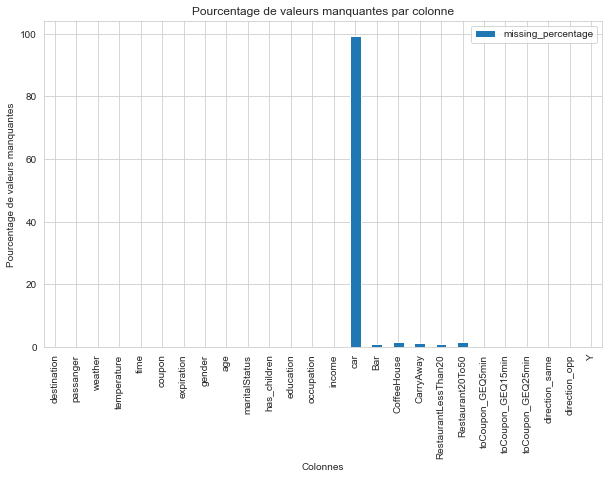

In [19]:

print('Is there any missing value ?', data.isnull().values.any())
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(), 'missing_percentage': missing_percentage})

# Créer un graphique pour les valeurs manquantes
missing_value_df.plot(kind='bar', y='missing_percentage', figsize=(10, 6))
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de valeurs manquantes')
plt.show()


In [20]:
print('Is there any missing value ?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]


Is there any missing value ? True


,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


In [21]:
# lorsque le pourcentage <5%  on peut supprimer les observations 
# test 

In [22]:
data = data.drop(['car'], axis=1)

In [23]:
#drop car
data2 = data.dropna()
print(data2.shape)
print(data.shape)

(12079, 25)
(12684, 25)


=> On choisit d'imputer les missing values parceque le taux des donnés perdus est très négligeable ; l'imputation ne va biaisée les données 

In [24]:
 data.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64>

In [25]:
# Imputer les valeurs manquantes par le mode (les variables sont catégorielles)
data['Bar']=data['Bar'].fillna(data['Bar'].mode()[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])




##  <span style="color:#053CA0"> Outliers :  </span>



In [26]:
# Pour les variables quantitatives : 
column_quant = data.select_dtypes(include="int64").columns
print(f"on a {len(column_quant)} variables quantitatives")
print(list(column_quant))

on a 8 variables quantitatives
['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


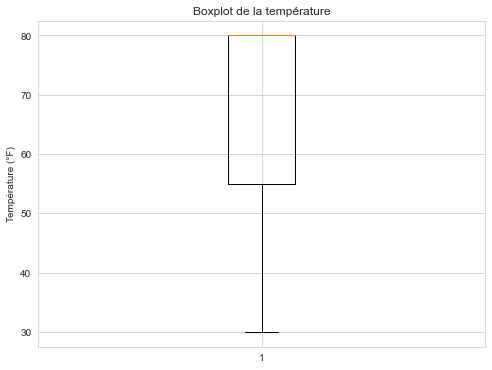

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['temperature'])
plt.title('Boxplot de la température')
plt.ylabel('Température (°F)')
plt.show()



In [28]:
#  la colonne à analyser est  'has_children'
colonne_a_analyser = 'has_children'

# Calculer la moyenne et l'écart-type de la colonne
moyenne = data[colonne_a_analyser].mean()
ecart_type = data[colonne_a_analyser].std()

# Z_score (par exemple, 2 écart-types)
seuil =2 * ecart_type

# Identifier les valeurs atypiques
valeurs_atypiques = data[abs(data[colonne_a_analyser] - moyenne) > seuil]

# Afficher les valeurs atypiques
print("Valeurs atypiques :", valeurs_atypiques)


Valeurs atypiques : Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]


In [29]:
# Spécifier la colonne à analyser
colonne_a_analyser = 'direction_same'

# Calculer la moyenne et l'écart-type de la colonne
moyenne = data[colonne_a_analyser].mean()
ecart_type = data[colonne_a_analyser].std()

# Définir un seuil pour les valeurs atypiques (par exemple, 2 écart-types)
seuil = 2 * ecart_type

# Identifier les valeurs atypiques
valeurs_atypiques = data[abs(data[colonne_a_analyser] - moyenne) > seuil]

# Afficher les valeurs atypiques
print("Valeurs atypiques :", valeurs_atypiques)


Valeurs atypiques : Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# boxplot
q1 = np.percentile(data['toCoupon_GEQ15min'], 25)
q3 = np.percentile(data['toCoupon_GEQ15min'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [x for x in data['toCoupon_GEQ15min'] if x < lower_bound or x > upper_bound]
print("Valeurs atypiques :", outliers)


Valeurs atypiques : []


In [31]:
import numpy as np
import matplotlib.pyplot as plt



# Identifiez les valeurs atypiques en fonction des seuils
q1 = np.percentile(data['Y'], 25)
q3 = np.percentile(data['Y'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [x for x in data['Y'] if x < lower_bound or x > upper_bound]
print("Valeurs atypiques :", outliers)


Valeurs atypiques : []


In [32]:
import numpy as np
import matplotlib.pyplot as plt



# Identifiez les valeurs atypiques en fonction des seuils
q1 = np.percentile(data['toCoupon_GEQ25min'], 25)
q3 = np.percentile(data['toCoupon_GEQ25min'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [x for x in data['toCoupon_GEQ25min'] if x < lower_bound or x > upper_bound]
print("Valeurs atypiques :", outliers)


Valeurs atypiques : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

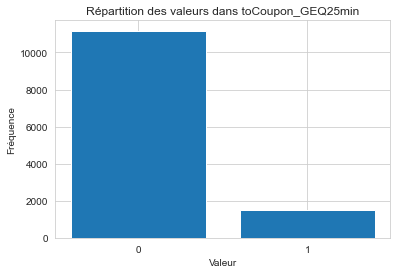

In [33]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle "data"
value_counts = data['toCoupon_GEQ25min'].value_counts()

# Obtenez le nombre de 0 et de 1
count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)

# Définissez la taille du graphe
plt.figure(figsize=(6, 4))  # Largeur x Hauteur

# Créez un graphe à barres
plt.bar(['0', '1'], [count_0, count_1])

# Ajoutez des étiquettes au graphe
plt.title('Répartition des valeurs dans toCoupon_GEQ25min')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Affichez le graphe
plt.show()



##  <span style="color:#053CA0"> Correlation </span>



In [34]:
data.corr() 

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


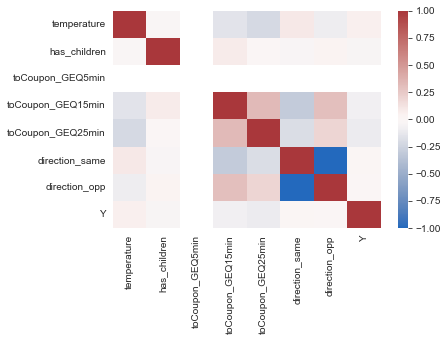

In [35]:
numerical_data = data.select_dtypes(include='number')
cmap = sns.color_palette('vlag', as_cmap=True)
sns.heatmap(numerical_data.select_dtypes('int64', 'float64').corr(), cmap=cmap)
plt.show()

 * Corrélation négative parfaite  entre 'direction_same' et 'direction_opp' : 
Cela signifie que ces deux fonctionnalités évoluent de manière identique 

 *Corrélation mauvaise : 'toCoupon_GEQ5min' a une variance de 0 : Cela signifie que la fonction 'toCoupon_GEQ5min' a la même valeur, soit '1', pour toutes les données de votre ensemble. En d'autres termes, toutes les observations indiquent que les restaurants/bars sont à au moins cinq minutes de route : elle n'apporte pas des informations supplémentaires  

    => Solution  : supprimer  'toCoupon_GEQ5min' et 'direction_opp'

In [36]:
data = data.drop(['toCoupon_GEQ5min', 'direction_opp'], axis=1)
data.shape

(12684, 23)


##  <span style="color:#053CA0"> Duplications </span>



In [37]:
duplications = data[data.duplicated()]

# Affichez les lignes en double
print("Duplications dans le dataset :")
print(duplications)

# Pour connaître le nombre total de duplications
total_duplications = len(duplications)
print(f"Nombre total de duplications : {total_duplications}")

Duplications dans le dataset :
     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     exp

In [38]:
duplicate = data[data.duplicated(keep = 'last')]
duplicate.shape

(74, 23)

In [39]:
data = data.drop_duplicates()
# ancienne : (12684, 23)
data.shape

(12610, 23)




#  <div align="left"> <span style="color:#1A489B"> <h3> Feature engineering techniques : </h3></span></div>


On va créer une nouvelle colonne nommée to_coupon à partir de toCoupon_GEQ15min toCoupon_GEQ25min
avec :
* **toCoupon_GEQ15min** : la durée de conduite pour restaurant/bar en utilisant le coupon est > 15 minutes :
{1:durée> 15 / 0:durée <15}
* **toCoupon_GEQ25min** : la durée de conduite pour restaurant/bar en utilisant le coupon est > 25 minutes :
{1:durée> 25 / 0:durée <25}

si durée **]0;15[** : valeur 0

si durée **[15;25[** : valeur 1

si durée **]25;~[** :valeur2

In [40]:
# création d'une nouvelle colonne "to_coupon " à partir de 'toCoupon_GEQ15min' et 'toCoupon_GEQ25min' 
# EXplication : 
data['to_coupon'] = 0  # Initialize to 0
data.loc[(data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ25min'] == 0), 'to_coupon'] = 1
data.loc[data['toCoupon_GEQ25min'] == 1, 'to_coupon'] = 2

print(data['to_coupon'].value_counts())


1    5596
0    5551
2    1463
Name: to_coupon, dtype: int64


In [41]:
data =  data.drop(['toCoupon_GEQ15min' , 'toCoupon_GEQ25min'], axis=1)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1


*conversion de faranheit à celsus*:
* *30 F:* -1,11111 c° => low temperature : <=30
* *55 F:* 12,7778 c°  => medium temperature: ]30;55]
* *80 F:* 26,6667 c° => => high temperature: >=55

In [42]:
#temperature  est une variable continue ; donc on aura 3 intervalles <30 entre 30 et 55 sup 55
data['temperature'].unique()

array([55, 80, 30], dtype=int64)

In [43]:
data['WeatherTemp'] = ''

# Associez les conditions à la température
for index, row in data.iterrows():
    temperature = row['temperature']
    weather = row['weather']
    if temperature <= 30:
        data.at[index, 'WeatherTemp'] = f"{weather} with low temperature."
    elif 30< temperature <= 55:
        data.at[index, 'WeatherTemp'] = f"{weather} with medium temperature."
    elif temperature >=55:
        data.at[index, 'WeatherTemp'] = f"{weather} with high temperature."

# Affichez le DataFrame résultant
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon,WeatherTemp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,Sunny with medium temperature.
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,Sunny with high temperature.
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,Sunny with high temperature.
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,Sunny with high temperature.
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,Sunny with high temperature.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,Rainy with medium temperature.
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,1,0,Rainy with medium temperature.
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,Snowy with low temperature.
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,2,Snowy with low temperature.


In [44]:
data =  data.drop(['weather' , 'temperature'], axis=1)
data

,destination,passanger,time,coupon,expiration,gender,age,maritalStatus,has_children,education,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon,WeatherTemp
0,No Urgent Place,Alone,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,Sunny with medium temperature.
1,No Urgent Place,Friend(s),10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,Sunny with high temperature.
2,No Urgent Place,Friend(s),10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,Sunny with high temperature.
3,No Urgent Place,Friend(s),2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,Sunny with high temperature.
4,No Urgent Place,Friend(s),2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,Sunny with high temperature.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,Rainy with medium temperature.
12680,Work,Alone,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,1,0,Rainy with medium temperature.
12681,Work,Alone,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,Snowy with low temperature.
12682,Work,Alone,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,2,Snowy with low temperature.


In [45]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [46]:
import pandas as pd

# Définissez la correspondance entre les catégories d'âge et les générations
generation_mapping = {
     'below21': 'Generation1',
    '21': 'Generation2',
    '26': 'Generation2',
    '31': 'Generation2',
    '36': 'Generation2',
    '41': 'Generation3',
    '46': 'Generation3',
    '50plus': 'Generation4'
}


# Utilisez la méthode .map pour créer la nouvelle colonne "generation"
generation = data['age'].map(generation_mapping)

# Affichez le DataFrame résultant
generation

0        Generation2
1        Generation2
2        Generation2
3        Generation2
4        Generation2
            ...     
12679    Generation2
12680    Generation2
12681    Generation2
12682    Generation2
12683    Generation2
Name: age, Length: 12610, dtype: object

In [47]:
data =  data.drop(['age'], axis=1)

In [48]:
data = pd.concat([data,generation], axis=1)
data.head()


,destination,passanger,time,coupon,expiration,gender,maritalStatus,has_children,education,occupation,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon,WeatherTemp,age
0,No Urgent Place,Alone,2PM,Restaurant(<20),1d,Female,Unmarried partner,1,Some college - no degree,Unemployed,...,never,never,1~3,4~8,1~3,0,1,0,Sunny with medium temperature.,Generation2
1,No Urgent Place,Friend(s),10AM,Coffee House,2h,Female,Unmarried partner,1,Some college - no degree,Unemployed,...,never,never,1~3,4~8,1~3,0,0,0,Sunny with high temperature.,Generation2
2,No Urgent Place,Friend(s),10AM,Carry out & Take away,2h,Female,Unmarried partner,1,Some college - no degree,Unemployed,...,never,never,1~3,4~8,1~3,0,1,1,Sunny with high temperature.,Generation2
3,No Urgent Place,Friend(s),2PM,Coffee House,2h,Female,Unmarried partner,1,Some college - no degree,Unemployed,...,never,never,1~3,4~8,1~3,0,0,1,Sunny with high temperature.,Generation2
4,No Urgent Place,Friend(s),2PM,Coffee House,1d,Female,Unmarried partner,1,Some college - no degree,Unemployed,...,never,never,1~3,4~8,1~3,0,0,1,Sunny with high temperature.,Generation2





#  <div align="center"> <span style="color:#1A489B"> <h2> Data transformation</h2></span></div>




## <span style="color:#053CA0"> A.Categorical features </span>



### 1.Ordinal Feature 


In [49]:
from sklearn.preprocessing import OrdinalEncoder

# initialisation des encoders
encoder_time = OrdinalEncoder(categories=[['7AM','10AM' ,'2PM', '6PM', '10PM']])
encoder_expiration = OrdinalEncoder(categories=[['2h','1d' ]])
encoder_education = OrdinalEncoder(categories=[['Some college - no degree' ,'Some High School', 'High School Graduate', 'Bachelors degree' ,'Associates degree','Graduate degree (Masters or Doctorate)']])
encoder_incomes = OrdinalEncoder(categories=[['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999'  ,'$75000 - $87499',
   '$87500 - $99999', '$100000 or More' ]])
encoder_bar = OrdinalEncoder(categories=[['never', 'less1', '1~3' ,'4~8', 'gt8' ]])
encoder_cofee = OrdinalEncoder(categories=[['never', 'less1', '1~3' ,'4~8', 'gt8' ]])
encoder_carryaway = OrdinalEncoder(categories=[['never', 'less1', '1~3' ,'4~8', 'gt8' ]])
encoder_restaurantlt20 = OrdinalEncoder(categories=[['never', 'less1', '1~3' ,'4~8', 'gt8' ]])
encoder_restaurantlt50 = OrdinalEncoder(categories=[['never', 'less1', '1~3' ,'4~8', 'gt8' ]])
encoder_age =  OrdinalEncoder(categories=[['Generation1','Generation2','Generation3','Generation4']])
encoder_gender =  OrdinalEncoder(categories=[['Male','Female']])
# encodage
encoded_time = encoder_time.fit_transform(data[["time"]])
encoded_expiration = encoder_expiration.fit_transform(data[["expiration"]])
encoded_education = encoder_education.fit_transform(data[["education"]])
encoded_incomes = encoder_incomes.fit_transform(data[["income"]])
encoded_bar = encoder_bar.fit_transform(data[["Bar"]])
encoded_cofee = encoder_cofee.fit_transform(data[["CoffeeHouse"]])
encoded_carryaway = encoder_carryaway.fit_transform(data[["CarryAway"]])
encoded_restaurantlt20 = encoder_restaurantlt20.fit_transform(data[["RestaurantLessThan20"]])
encoded_restaurantlt50 = encoder_restaurantlt50.fit_transform(data[["Restaurant20To50"]])
encoded_age= encoder_age.fit_transform(data[["age"]])
encoded_gender= encoder_gender.fit_transform(data[["gender"]])
# nous ajoutons gender car elle n'est qu'a deux modalité

data["time"] = encoded_time
data["expiration"] = encoded_expiration
data["education"] = encoded_education
data["income"] = encoded_incomes
data["Bar"] = encoded_bar
data["CoffeeHouse"] = encoded_cofee
data["CarryAway"] = encoded_carryaway
data["RestaurantLessThan20"] = encoded_restaurantlt20
data["Restaurant20To50"] = encoded_restaurantlt50
data["age"]=encoded_age
data["gender"]=encoded_gender


In [50]:
data.head()

,destination,passanger,time,coupon,expiration,gender,maritalStatus,has_children,education,occupation,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon,WeatherTemp,age
0,No Urgent Place,Alone,2.0,Restaurant(<20),1.0,1.0,Unmarried partner,1,0.0,Unemployed,...,0.0,0.0,2.0,3.0,2.0,0,1,0,Sunny with medium temperature.,1.0
1,No Urgent Place,Friend(s),1.0,Coffee House,0.0,1.0,Unmarried partner,1,0.0,Unemployed,...,0.0,0.0,2.0,3.0,2.0,0,0,0,Sunny with high temperature.,1.0
2,No Urgent Place,Friend(s),1.0,Carry out & Take away,0.0,1.0,Unmarried partner,1,0.0,Unemployed,...,0.0,0.0,2.0,3.0,2.0,0,1,1,Sunny with high temperature.,1.0
3,No Urgent Place,Friend(s),2.0,Coffee House,0.0,1.0,Unmarried partner,1,0.0,Unemployed,...,0.0,0.0,2.0,3.0,2.0,0,0,1,Sunny with high temperature.,1.0
4,No Urgent Place,Friend(s),2.0,Coffee House,1.0,1.0,Unmarried partner,1,0.0,Unemployed,...,0.0,0.0,2.0,3.0,2.0,0,0,1,Sunny with high temperature.,1.0


In [51]:
data.tail()

,destination,passanger,time,coupon,expiration,gender,maritalStatus,has_children,education,occupation,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon,WeatherTemp,age
12679,Home,Partner,3.0,Carry out & Take away,1.0,0.0,Single,0,3.0,Sales & Related,...,0.0,0.0,2.0,3.0,2.0,1,1,0,Rainy with medium temperature.,1.0
12680,Work,Alone,0.0,Carry out & Take away,1.0,0.0,Single,0,3.0,Sales & Related,...,0.0,0.0,2.0,3.0,2.0,0,1,0,Rainy with medium temperature.,1.0
12681,Work,Alone,0.0,Coffee House,1.0,0.0,Single,0,3.0,Sales & Related,...,0.0,0.0,2.0,3.0,2.0,1,0,0,Snowy with low temperature.,1.0
12682,Work,Alone,0.0,Bar,1.0,0.0,Single,0,3.0,Sales & Related,...,0.0,0.0,2.0,3.0,2.0,0,0,2,Snowy with low temperature.,1.0
12683,Work,Alone,0.0,Restaurant(20-50),0.0,0.0,Single,0,3.0,Sales & Related,...,0.0,0.0,2.0,3.0,2.0,1,0,0,Sunny with high temperature.,1.0


### 2. Binary encoding

Encodage des variables qualitatives nominales à plusieurs modalité

In [52]:
from category_encoders import BinaryEncoder

binary_encoder =  BinaryEncoder(cols=["destination","WeatherTemp","passanger","coupon","maritalStatus","occupation"])
binary_encodingResult =  binary_encoder.fit(data)
binary_encodingResult = binary_encodingResult.transform(data)
data=binary_encodingResult
data

,destination_0,destination_1,passanger_0,passanger_1,passanger_2,time,coupon_0,coupon_1,coupon_2,expiration,...,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,to_coupon,WeatherTemp_0,WeatherTemp_1,WeatherTemp_2,age
0,0,1,0,0,1,2.0,0,0,1,1.0,...,2.0,3.0,2.0,0,1,0,0,0,1,1.0
1,0,1,0,1,0,1.0,0,1,0,0.0,...,2.0,3.0,2.0,0,0,0,0,1,0,1.0
2,0,1,0,1,0,1.0,0,1,1,0.0,...,2.0,3.0,2.0,0,1,1,0,1,0,1.0
3,0,1,0,1,0,2.0,0,1,0,0.0,...,2.0,3.0,2.0,0,0,1,0,1,0,1.0
4,0,1,0,1,0,2.0,0,1,0,1.0,...,2.0,3.0,2.0,0,0,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,1,0,0,3.0,0,1,1,1.0,...,2.0,3.0,2.0,1,1,0,0,1,1,1.0
12680,1,1,0,0,1,0.0,0,1,1,1.0,...,2.0,3.0,2.0,0,1,0,0,1,1,1.0
12681,1,1,0,0,1,0.0,0,1,0,1.0,...,2.0,3.0,2.0,1,0,0,1,0,1,1.0
12682,1,1,0,0,1,0.0,1,0,0,1.0,...,2.0,3.0,2.0,0,0,2,1,0,1,1.0


In [53]:
data.columns

Index(['destination_0', 'destination_1', 'passanger_0', 'passanger_1',
       'passanger_2', 'time', 'coupon_0', 'coupon_1', 'coupon_2', 'expiration',
       'gender', 'maritalStatus_0', 'maritalStatus_1', 'maritalStatus_2',
       'has_children', 'education', 'occupation_0', 'occupation_1',
       'occupation_2', 'occupation_3', 'occupation_4', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'direction_same', 'Y', 'to_coupon', 'WeatherTemp_0', 'WeatherTemp_1',
       'WeatherTemp_2', 'age'],
      dtype='object')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination_0         12610 non-null  int64  
 1   destination_1         12610 non-null  int64  
 2   passanger_0           12610 non-null  int64  
 3   passanger_1           12610 non-null  int64  
 4   passanger_2           12610 non-null  int64  
 5   time                  12610 non-null  float64
 6   coupon_0              12610 non-null  int64  
 7   coupon_1              12610 non-null  int64  
 8   coupon_2              12610 non-null  int64  
 9   expiration            12610 non-null  float64
 10  gender                12610 non-null  float64
 11  maritalStatus_0       12610 non-null  int64  
 12  maritalStatus_1       12610 non-null  int64  
 13  maritalStatus_2       12610 non-null  int64  
 14  has_children          12610 non-null  int64  
 15  education          

In [55]:
data.shape

(12610, 34)


### <span style="color:#053CA0"> Separer X et Y</span>



In [56]:
X = data.drop(columns=["Y"],axis=1)
Y = data["Y"]
# pour appliquer la methode de PCA 

In [57]:
X.head()

,destination_0,destination_1,passanger_0,passanger_1,passanger_2,time,coupon_0,coupon_1,coupon_2,expiration,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,to_coupon,WeatherTemp_0,WeatherTemp_1,WeatherTemp_2,age
0,0,1,0,0,1,2.0,0,0,1,1.0,...,0.0,2.0,3.0,2.0,0,0,0,0,1,1.0
1,0,1,0,1,0,1.0,0,1,0,0.0,...,0.0,2.0,3.0,2.0,0,0,0,1,0,1.0
2,0,1,0,1,0,1.0,0,1,1,0.0,...,0.0,2.0,3.0,2.0,0,1,0,1,0,1.0
3,0,1,0,1,0,2.0,0,1,0,0.0,...,0.0,2.0,3.0,2.0,0,1,0,1,0,1.0
4,0,1,0,1,0,2.0,0,1,0,1.0,...,0.0,2.0,3.0,2.0,0,1,0,1,0,1.0


In [58]:
data = pd.concat([X,Y] , axis=1) 
# pour mettre la colonne cible en dernière colonne car le binary encoding change l'ordre des colonnes


In [59]:
data.head()

,destination_0,destination_1,passanger_0,passanger_1,passanger_2,time,coupon_0,coupon_1,coupon_2,expiration,...,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,to_coupon,WeatherTemp_0,WeatherTemp_1,WeatherTemp_2,age,Y
0,0,1,0,0,1,2.0,0,0,1,1.0,...,2.0,3.0,2.0,0,0,0,0,1,1.0,1
1,0,1,0,1,0,1.0,0,1,0,0.0,...,2.0,3.0,2.0,0,0,0,1,0,1.0,0
2,0,1,0,1,0,1.0,0,1,1,0.0,...,2.0,3.0,2.0,0,1,0,1,0,1.0,1
3,0,1,0,1,0,2.0,0,1,0,0.0,...,2.0,3.0,2.0,0,1,0,1,0,1.0,0
4,0,1,0,1,0,2.0,0,1,0,1.0,...,2.0,3.0,2.0,0,1,0,1,0,1.0,0


# <span style="color:#053CA0"> B. Scaling  </span>



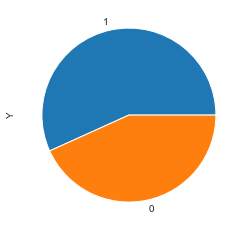

In [60]:
#test equilibrage de Y  : n'est pas equilibré 
Y.value_counts().plot.pie()
plt.show()

In [61]:
#test de la normalité  : X ne suit pas la loi normale : 

X.describe()

,destination_0,destination_1,passanger_0,passanger_1,passanger_2,time,coupon_0,coupon_1,coupon_2,expiration,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,to_coupon,WeatherTemp_0,WeatherTemp_1,WeatherTemp_2,age
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,...,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,0.503093,0.743854,0.084774,0.340444,0.654163,1.898414,0.277399,0.502220,0.524266,0.557573,...,1.565583,2.414988,2.286122,1.268993,0.215543,0.675813,0.182791,0.608803,0.414512,1.378826
std,0.500010,0.436521,0.278556,0.473877,0.475659,1.430796,0.447733,0.500015,0.499431,0.496694,...,1.233673,0.926148,0.916693,0.879962,0.411215,0.671687,0.386511,0.488038,0.492657,0.777251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000


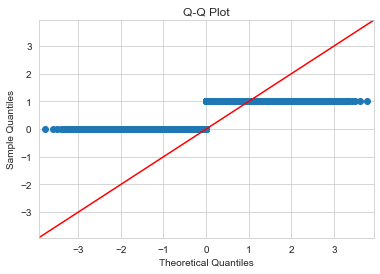

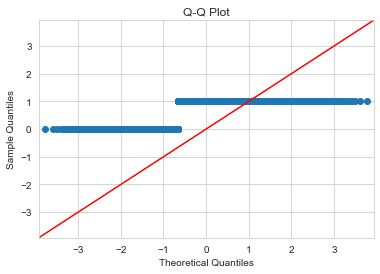

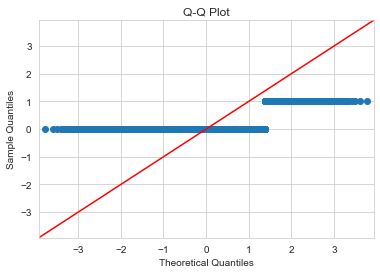

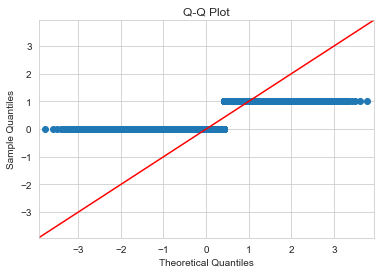

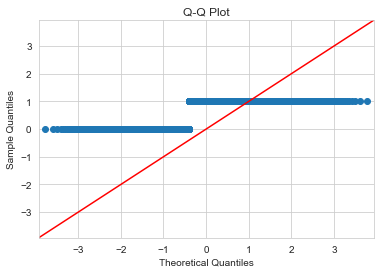

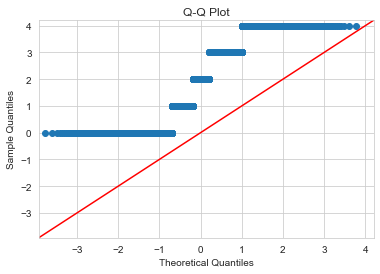

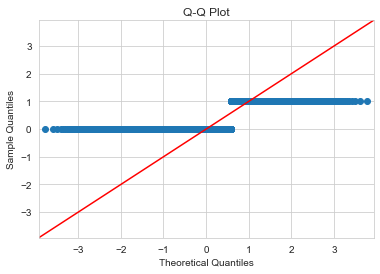

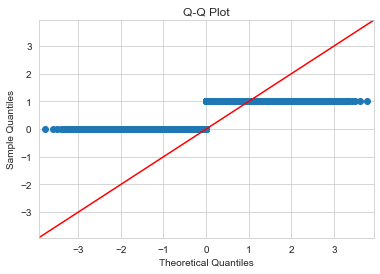

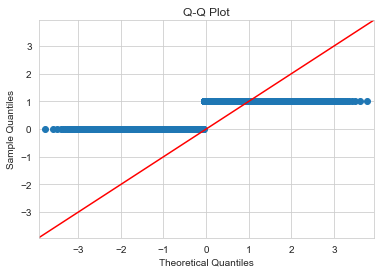

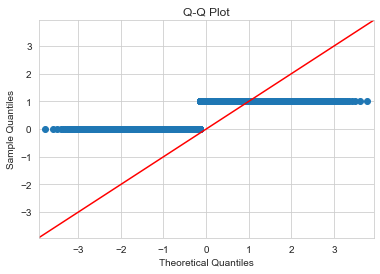

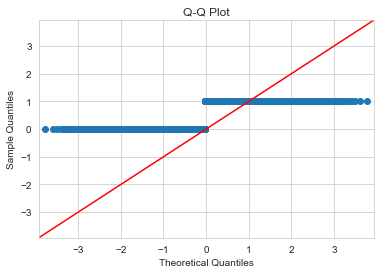

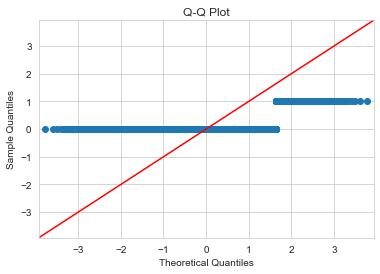

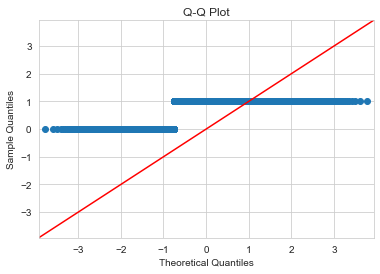

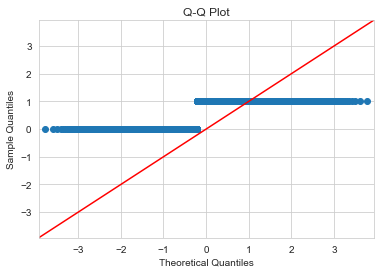

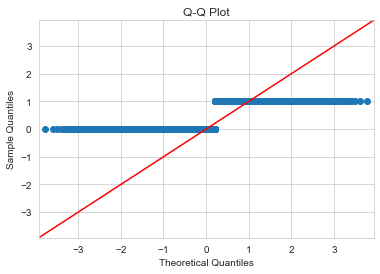

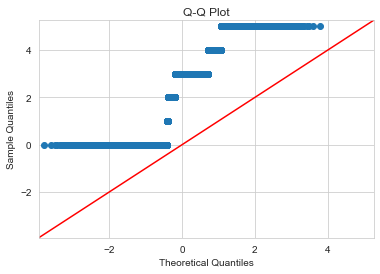

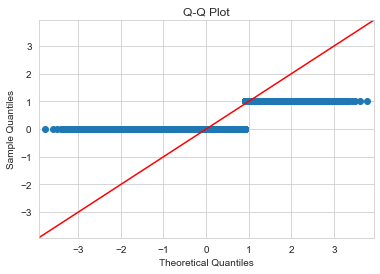

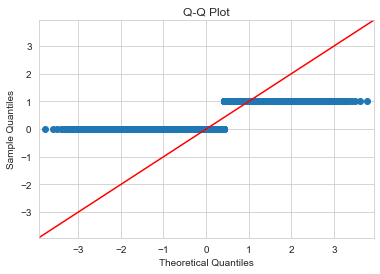

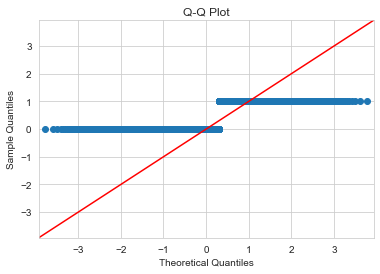

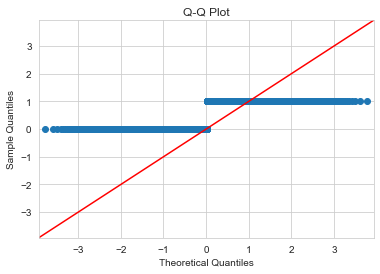

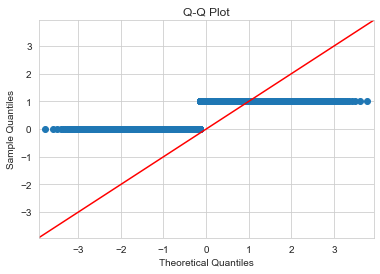

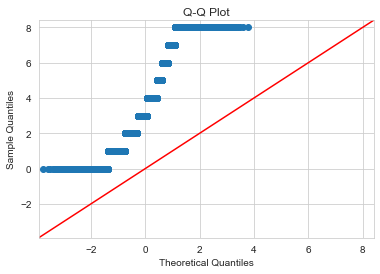

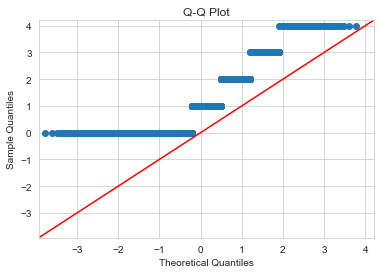

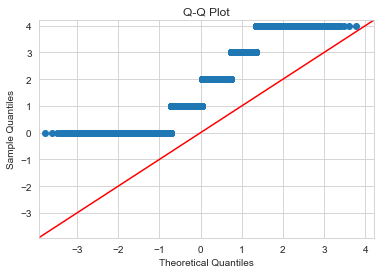

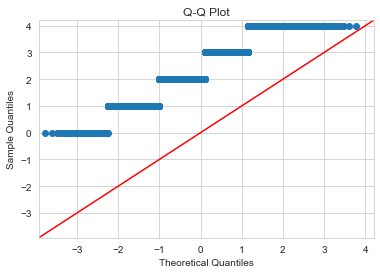

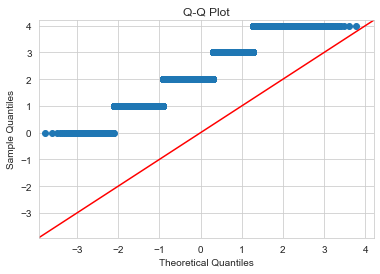

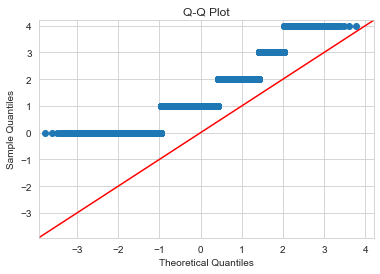

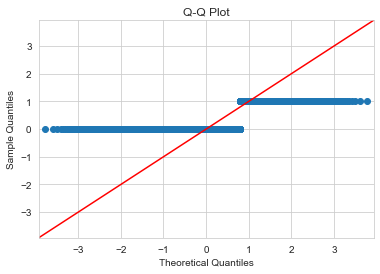

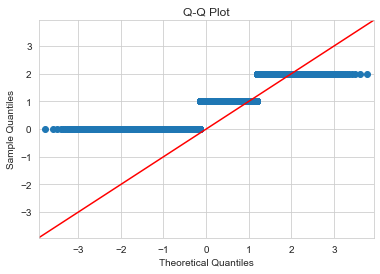

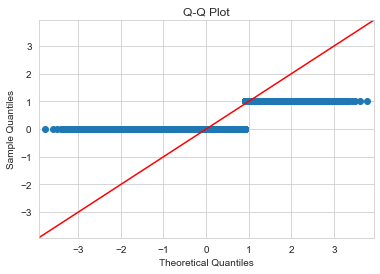

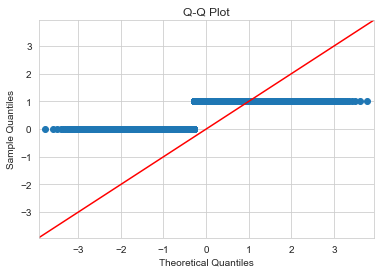

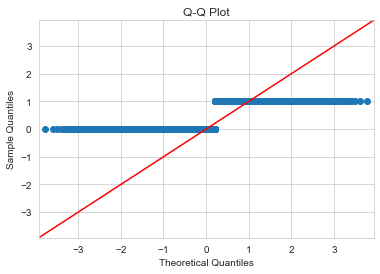

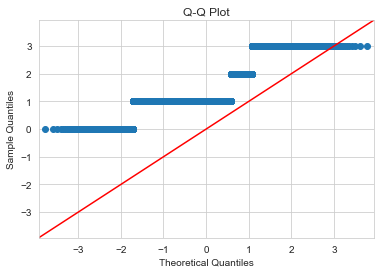

In [62]:
import statsmodels.api as sm
for column_name in X.columns:
    dX = X[column_name]
    sm.qqplot(dX, line='45')
    plt.title("Q-Q Plot")
    plt.show()

 Donc on ne peut pas utiliser   StandardScaler 

#### On utilise le robuste scaler car notre jeu de donnée n'est pas équilibré

In [63]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Création de l'objet RobustScaler
# scaler = RobustScaler()

# Application de la mise à l'échelle aux données
X = scaler.fit_transform(X)

##  <div align="center"> <span style="color:#053CA0"> Dimensionality Reduction </span></div>





##   <span style="color:blue"> A. Feature selection 



In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.drop(columns=["Y"],axis=1)
Y = data["Y"]
test = SelectKBest(score_func=chi2)
fit = test.fit(X, Y)
fit_pd = pd.DataFrame({
    "colonne":X.columns,
    "score" : fit.scores_
})
fit_pd = fit_pd.sort_values(by="score", ascending=False)

fit_pd

,colonne,score
6,coupon_0,296.276577
8,coupon_2,215.865424
23,CoffeeHouse,160.230790
0,destination_0,109.353507
28,to_coupon,106.871860
9,expiration,92.462574
3,passanger_1,76.787247
22,Bar,73.103827
4,passanger_2,69.772608
15,education,50.323460


In [65]:
data =  data.drop(['occupation_1','occupation_4','maritalStatus_1'], axis=1)

In [66]:
data.head()

,destination_0,destination_1,passanger_0,passanger_1,passanger_2,time,coupon_0,coupon_1,coupon_2,expiration,...,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,to_coupon,WeatherTemp_0,WeatherTemp_1,WeatherTemp_2,age,Y
0,0,1,0,0,1,2.0,0,0,1,1.0,...,2.0,3.0,2.0,0,0,0,0,1,1.0,1
1,0,1,0,1,0,1.0,0,1,0,0.0,...,2.0,3.0,2.0,0,0,0,1,0,1.0,0
2,0,1,0,1,0,1.0,0,1,1,0.0,...,2.0,3.0,2.0,0,1,0,1,0,1.0,1
3,0,1,0,1,0,2.0,0,1,0,0.0,...,2.0,3.0,2.0,0,1,0,1,0,1.0,0
4,0,1,0,1,0,2.0,0,1,0,1.0,...,2.0,3.0,2.0,0,1,0,1,0,1.0,0


In [67]:
data.shape

(12610, 31)


# <span style="color:#053CA0"> B. PCA   </span>



## Method 1: Computation using "PCA"

on garde 19 car le nombre de colonne ayant un score > 10 est 19 (10 a été pris arbitrairement)

In [68]:
# Principal Component Analysis
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(n_components =19) 
# fit on data: Apply PCA on data
pca.fit(X)

PCA(n_components=19)

In [69]:
# access values and vectors/

#Principal components: eigenvectors
E_v=pca.components_
print(E_v)
print("===================================================")
#Variance proportions associated with the axes: eigenvalues.
PV=pca.explained_variance_
print(PV)



[[-5.22088306e-03  1.97058493e-03  2.87756707e-03  7.39262283e-03
  -8.98551092e-04  9.31636574e-03  2.10205111e-03 -2.05589295e-03
   6.90373910e-04 -4.19667584e-03 -1.78004770e-02 -1.57118184e-02
   3.49891423e-02  4.65649671e-02  2.08710463e-02  2.78695707e-01
   6.56291637e-03  2.28566817e-02 -6.61784375e-03 -2.34950529e-02
  -4.46768481e-02  9.52138163e-01  3.11025994e-02  1.21676375e-02
   9.00380257e-03  4.95690902e-02  6.39722511e-02 -4.12427374e-03
   4.60948790e-03  3.75801549e-03 -4.95066495e-03  3.22157596e-03
   1.30660270e-02]
 [ 4.07194159e-03 -1.01169299e-02 -5.65864432e-03  2.31744293e-03
   6.99430631e-03  4.02765545e-02 -2.50280619e-03  1.79002761e-03
   2.43005214e-03 -1.92970997e-03  2.29624730e-02  1.03532752e-02
  -4.58800671e-03 -1.03427377e-02  2.22865900e-02  9.41056061e-01
   4.30747121e-03 -3.57519581e-03 -2.29150137e-03 -5.44860824e-02
  -2.54710365e-02 -2.83034980e-01  3.43577070e-02  1.40863123e-01
  -2.98062259e-02  1.84033397e-02  1.43746360e-02  3.5479

In [70]:
# transform data/ Projection
B = pca.transform(X)
B.shape

(12610, 19)

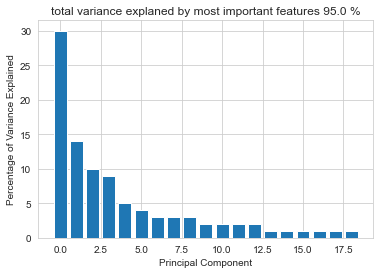

In [71]:
# PCA scree plot:
percent_variance = np.round(pca.explained_variance_ratio_* 100)
plt.bar(x= range(0,19), height=percent_variance)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title(f'total variance explaned by most important features {sum(percent_variance)} %')
plt.show()


## Method(2): Manual Computation

In [72]:

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig


In [73]:

X = data.drop(columns=["Y"],axis=1)
Y = data["Y"]

# Création de l'objet RobustScaler
scaler = RobustScaler()

# Application de la mise à l'échelle aux données
X = scaler.fit_transform(X)

In [74]:
##Data centering and reduction 
mean_vector = mean(X, axis = 0)
S = X - mean_vector
std_vector=np.std(X,axis = 0)
A=S/std_vector
A

array([[-1.00620482,  0.58681316, -0.30434567, ..., -1.24749902,
         1.18847537, -0.48741158],
       [-1.00620482,  0.58681316, -0.30434567, ...,  0.80160384,
        -0.84141416, -0.48741158],
       [-1.00620482,  0.58681316, -0.30434567, ...,  0.80160384,
        -0.84141416, -0.48741158],
       ...,
       [ 0.99383345,  0.58681316, -0.30434567, ..., -1.24749902,
         1.18847537, -0.48741158],
       [ 0.99383345,  0.58681316, -0.30434567, ..., -1.24749902,
         1.18847537, -0.48741158],
       [ 0.99383345,  0.58681316, -0.30434567, ...,  0.80160384,
        -0.84141416, -0.48741158]])

In [75]:
# compute the covariance matrix of the centered matrix
cov_m = np.cov(A,rowvar=False)
cov_m

array([[ 1.00007931e+00, -5.83240793e-01, -1.59907503e-01,
        -6.77441309e-01,  6.45960405e-01, -1.37643953e-01,
         1.09893448e-01,  7.26911456e-03,  5.97284724e-02,
         5.70878041e-02,  5.86863240e-03,  1.26499137e-02,
        -4.67947736e-02, -2.24311122e-02,  5.10249060e-03,
        -6.40832225e-03, -1.94877809e-03,  3.44442351e-03,
        -2.57997489e-02,  4.85926631e-04,  3.84998851e-03,
        -1.65872117e-03, -1.57742742e-02, -1.39688434e-02,
         5.20991601e-01,  1.42320724e-01,  9.74184438e-02,
        -1.17739389e-01,  1.23748200e-01, -2.02604859e-02],
       [-5.83240793e-01,  1.00007931e+00,  1.09713951e-02,
         3.69483761e-01, -3.28532270e-01, -5.93061161e-01,
        -1.05513028e-01,  1.64148222e-02, -3.87891147e-02,
        -9.89089808e-03, -9.81171471e-03, -4.80617970e-03,
         1.18481712e-02,  8.80525899e-03, -1.26500096e-02,
         7.19374469e-03, -3.63918864e-03,  1.97428340e-04,
         1.55659421e-02,  8.37163445e-03,  4.17200870e-

In [76]:
# eigenvectors and eigenvalues of covariance matrix
values, vectors = eig(cov_m)

### En appliquant la kaiser rule , on ne laisse que les colonnes dont la valeur propre est >= 1

In [77]:

print(f" le nombre de valeur propre  supérieur à 1 est {(values>=1).sum()}")
print(values[values>=1])


 le nombre de valeur propre  supérieur à 1 est 12
[3.08370856 2.28648938 2.1731269  1.9807866  1.80237647 1.56748962
 1.53434789 1.27965529 1.26626273 1.17561425 1.07978092 1.02507392]


In [78]:
value_index = np.argsort(values)[::-1]
vectors = vectors[:, value_index]
values = values[value_index]
print("-------index--------")
print(value_index)
print("-------vector--------")
print(vectors)

-------index--------
[ 0  1  2  3  4  5  6 12 13 14 15 16 18 21 27 28 29 26 25 24 23 22 20 19
 17 11 10  9  8  7]
-------vector--------
[[ 5.11383177e-01 -7.79604292e-02 -8.38944257e-03  3.51250109e-02
   6.47475392e-02 -3.82576147e-02  2.96245157e-02 -1.38049421e-02
   2.31659604e-03 -2.14905129e-03  1.75812536e-02 -1.59043961e-01
   1.96062787e-02  7.15990648e-03 -6.97065633e-02 -9.38872398e-02
  -1.68111446e-05 -8.01506321e-02 -4.16315297e-02  6.62879656e-03
   6.98898479e-02  2.27172513e-02 -1.63930490e-01 -1.05306846e-02
   1.67805680e-02  4.21053197e-01  2.63329182e-01  2.85192598e-01
   1.14467690e-01  5.50203881e-01]
 [-3.53790747e-01  1.51642675e-01  5.87194573e-02 -8.68431368e-02
   3.11395460e-01  1.42574557e-01  3.16079955e-01 -7.02837380e-02
  -7.17063180e-02  2.52507691e-01 -3.69108042e-02  9.27594403e-02
  -2.32496764e-02  3.23123143e-02  9.46670737e-02  1.12975047e-01
   1.31400085e-03 -7.37633778e-02  1.66097626e-02 -1.03589885e-02
  -3.15774340e-02  9.96344054e-03 -3.

In [79]:
total_variance = sum(values)
explained_variance = values / total_variance

In [80]:
print(explained_variance)

[0.10278213 0.07621027 0.07243182 0.06602098 0.06007445 0.05224551
 0.05114087 0.04265179 0.04220541 0.03918403 0.03598984 0.03416642
 0.03199744 0.03007286 0.02750413 0.02631332 0.0260418  0.02411347
 0.02268057 0.02174922 0.01996942 0.0191874  0.01746866 0.01566846
 0.01326312 0.00925282 0.00731525 0.00615645 0.00351162 0.00263043]


In [81]:
num_components_to_keep = 12 # kaiser Rule

In [82]:
projection_matrix = vectors[:, :num_components_to_keep]
X_std = A
X_projected = X_std.dot(projection_matrix)

In [83]:
X_projected

array([[ 0.12733091,  1.47494874, -0.42673716, ...,  1.5778242 ,
        -0.16308112,  1.32075583],
       [-2.77104611, -0.80446911, -1.229825  , ...,  0.02361447,
         0.1916081 ,  0.24265449],
       [-2.65037478, -0.30856407, -1.13414466, ...,  1.09893329,
         0.19993515, -1.06713388],
       ...,
       [ 2.10463196,  0.3110377 ,  0.96118222, ...,  0.84223908,
         0.84526508,  1.94957596],
       [ 1.87417671,  2.78790635,  1.58918247, ..., -0.39303663,
         1.01106039, -0.21160125],
       [ 1.49436371, -1.84673949,  0.02259795, ...,  1.30818885,
         1.22875971, -0.33976721]])

[ 0  1  2  3  4  5  6 12 13 14 15 16]
['destination_0', 'destination_1', 'passanger_0', 'passanger_1', 'passanger_2', 'time', 'coupon_0', 'maritalStatus_2', 'has_children', 'education', 'occupation_0', 'occupation_2']


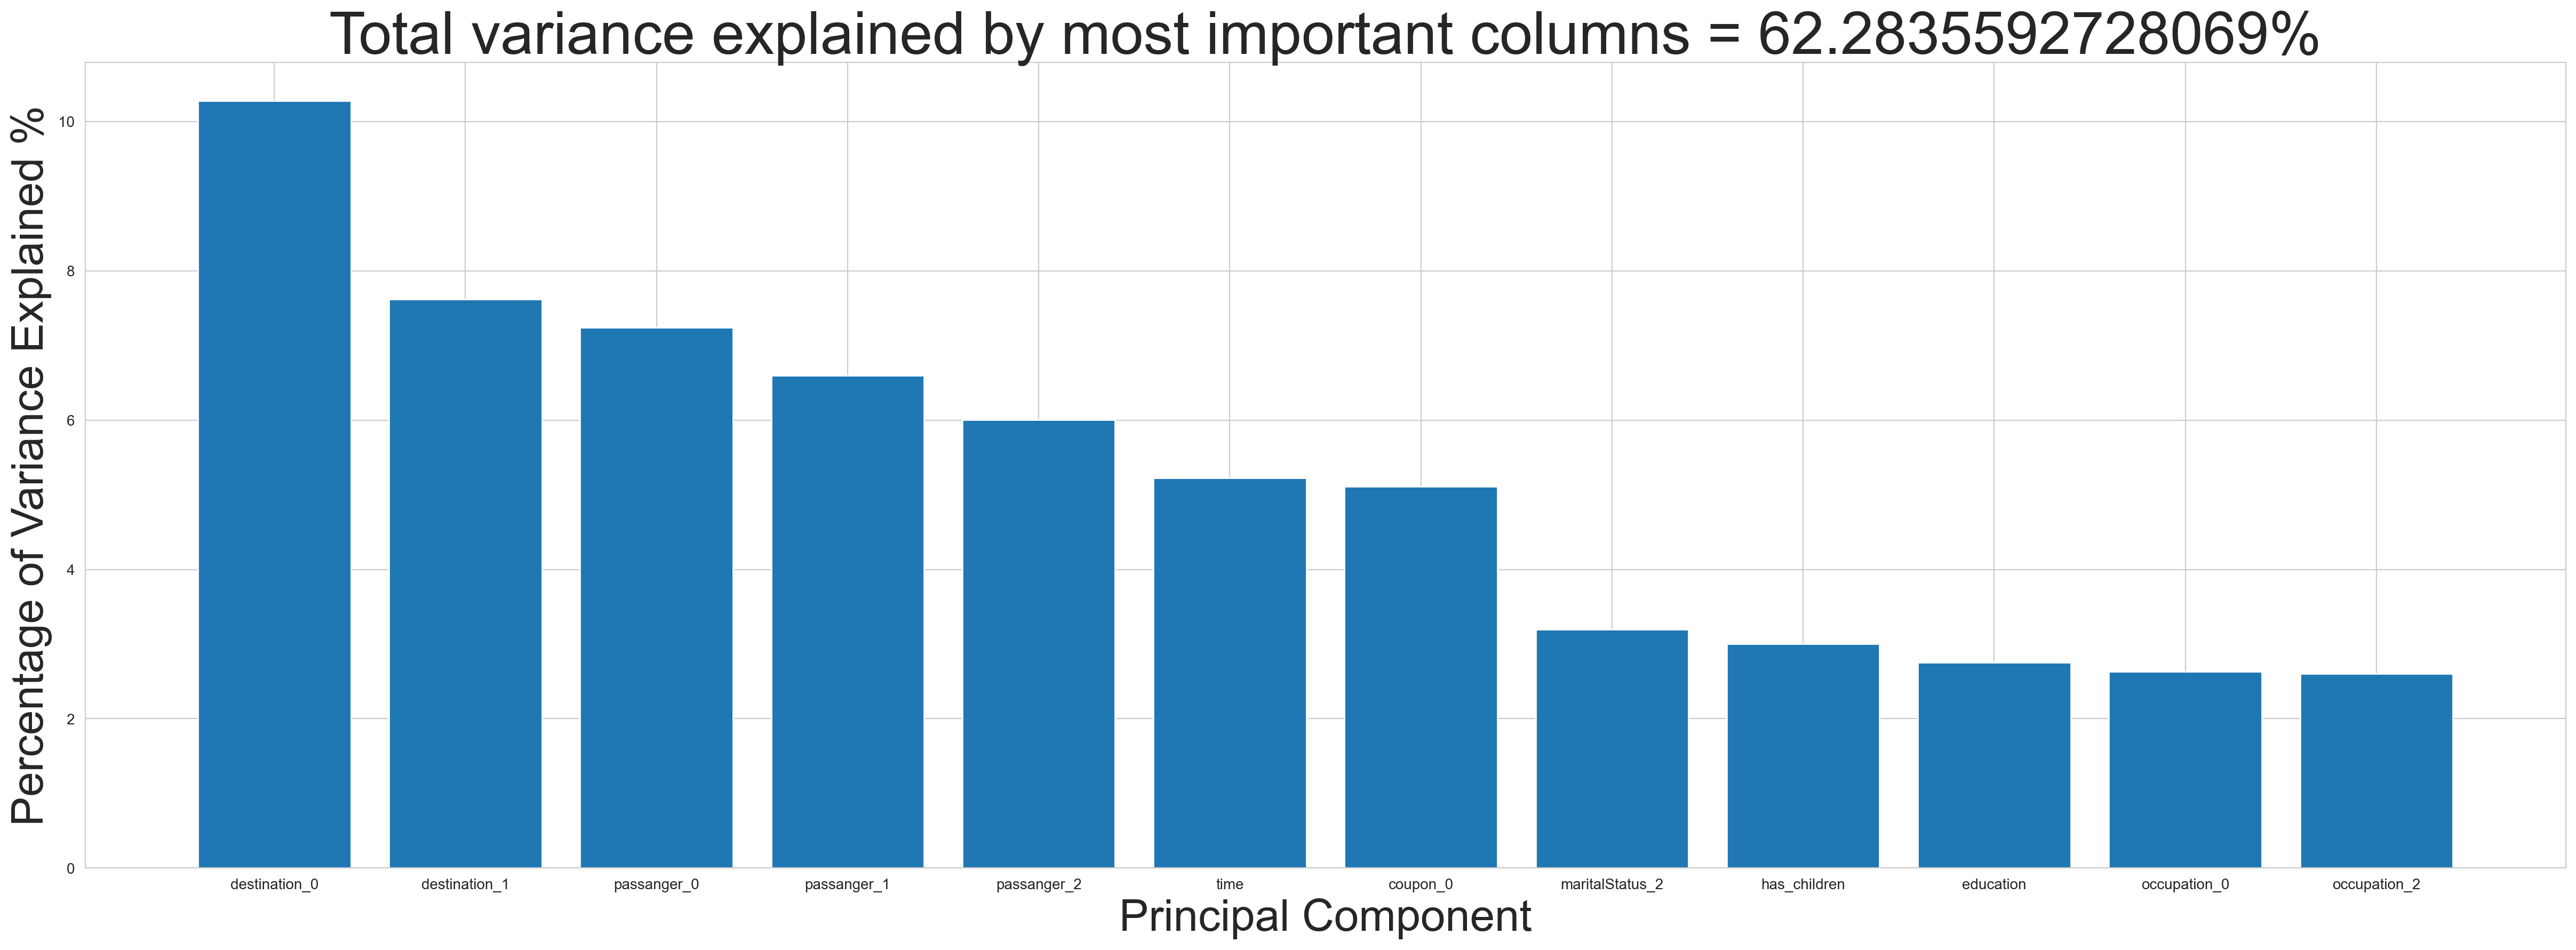

In [84]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.dpi'] = 200

x = value_index[:num_components_to_keep]
print(x)
print([data.columns[i] for i in x ])
plt.bar([data.columns[i] for i in x ], height=[explained_variance[i]*100 for i in x])
plt.ylabel('Percentage of Variance Explained %',fontsize=30)
plt.xlabel('Principal Component',fontsize=30)
plt.title(f"Total variance explained by most important columns = {sum([explained_variance[i]*100 for i in x])}%",fontsize=40)
plt.show()

##  without kaiser rule

In [85]:
num_components_to_keep = 16

In [86]:
value_index = np.argsort(values)[::-1]
vectors = vectors[:, value_index]
values = values[value_index]
projection_matrix = vectors[:, :num_components_to_keep]
X_std = A
X_projected = X_std.dot(projection_matrix)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


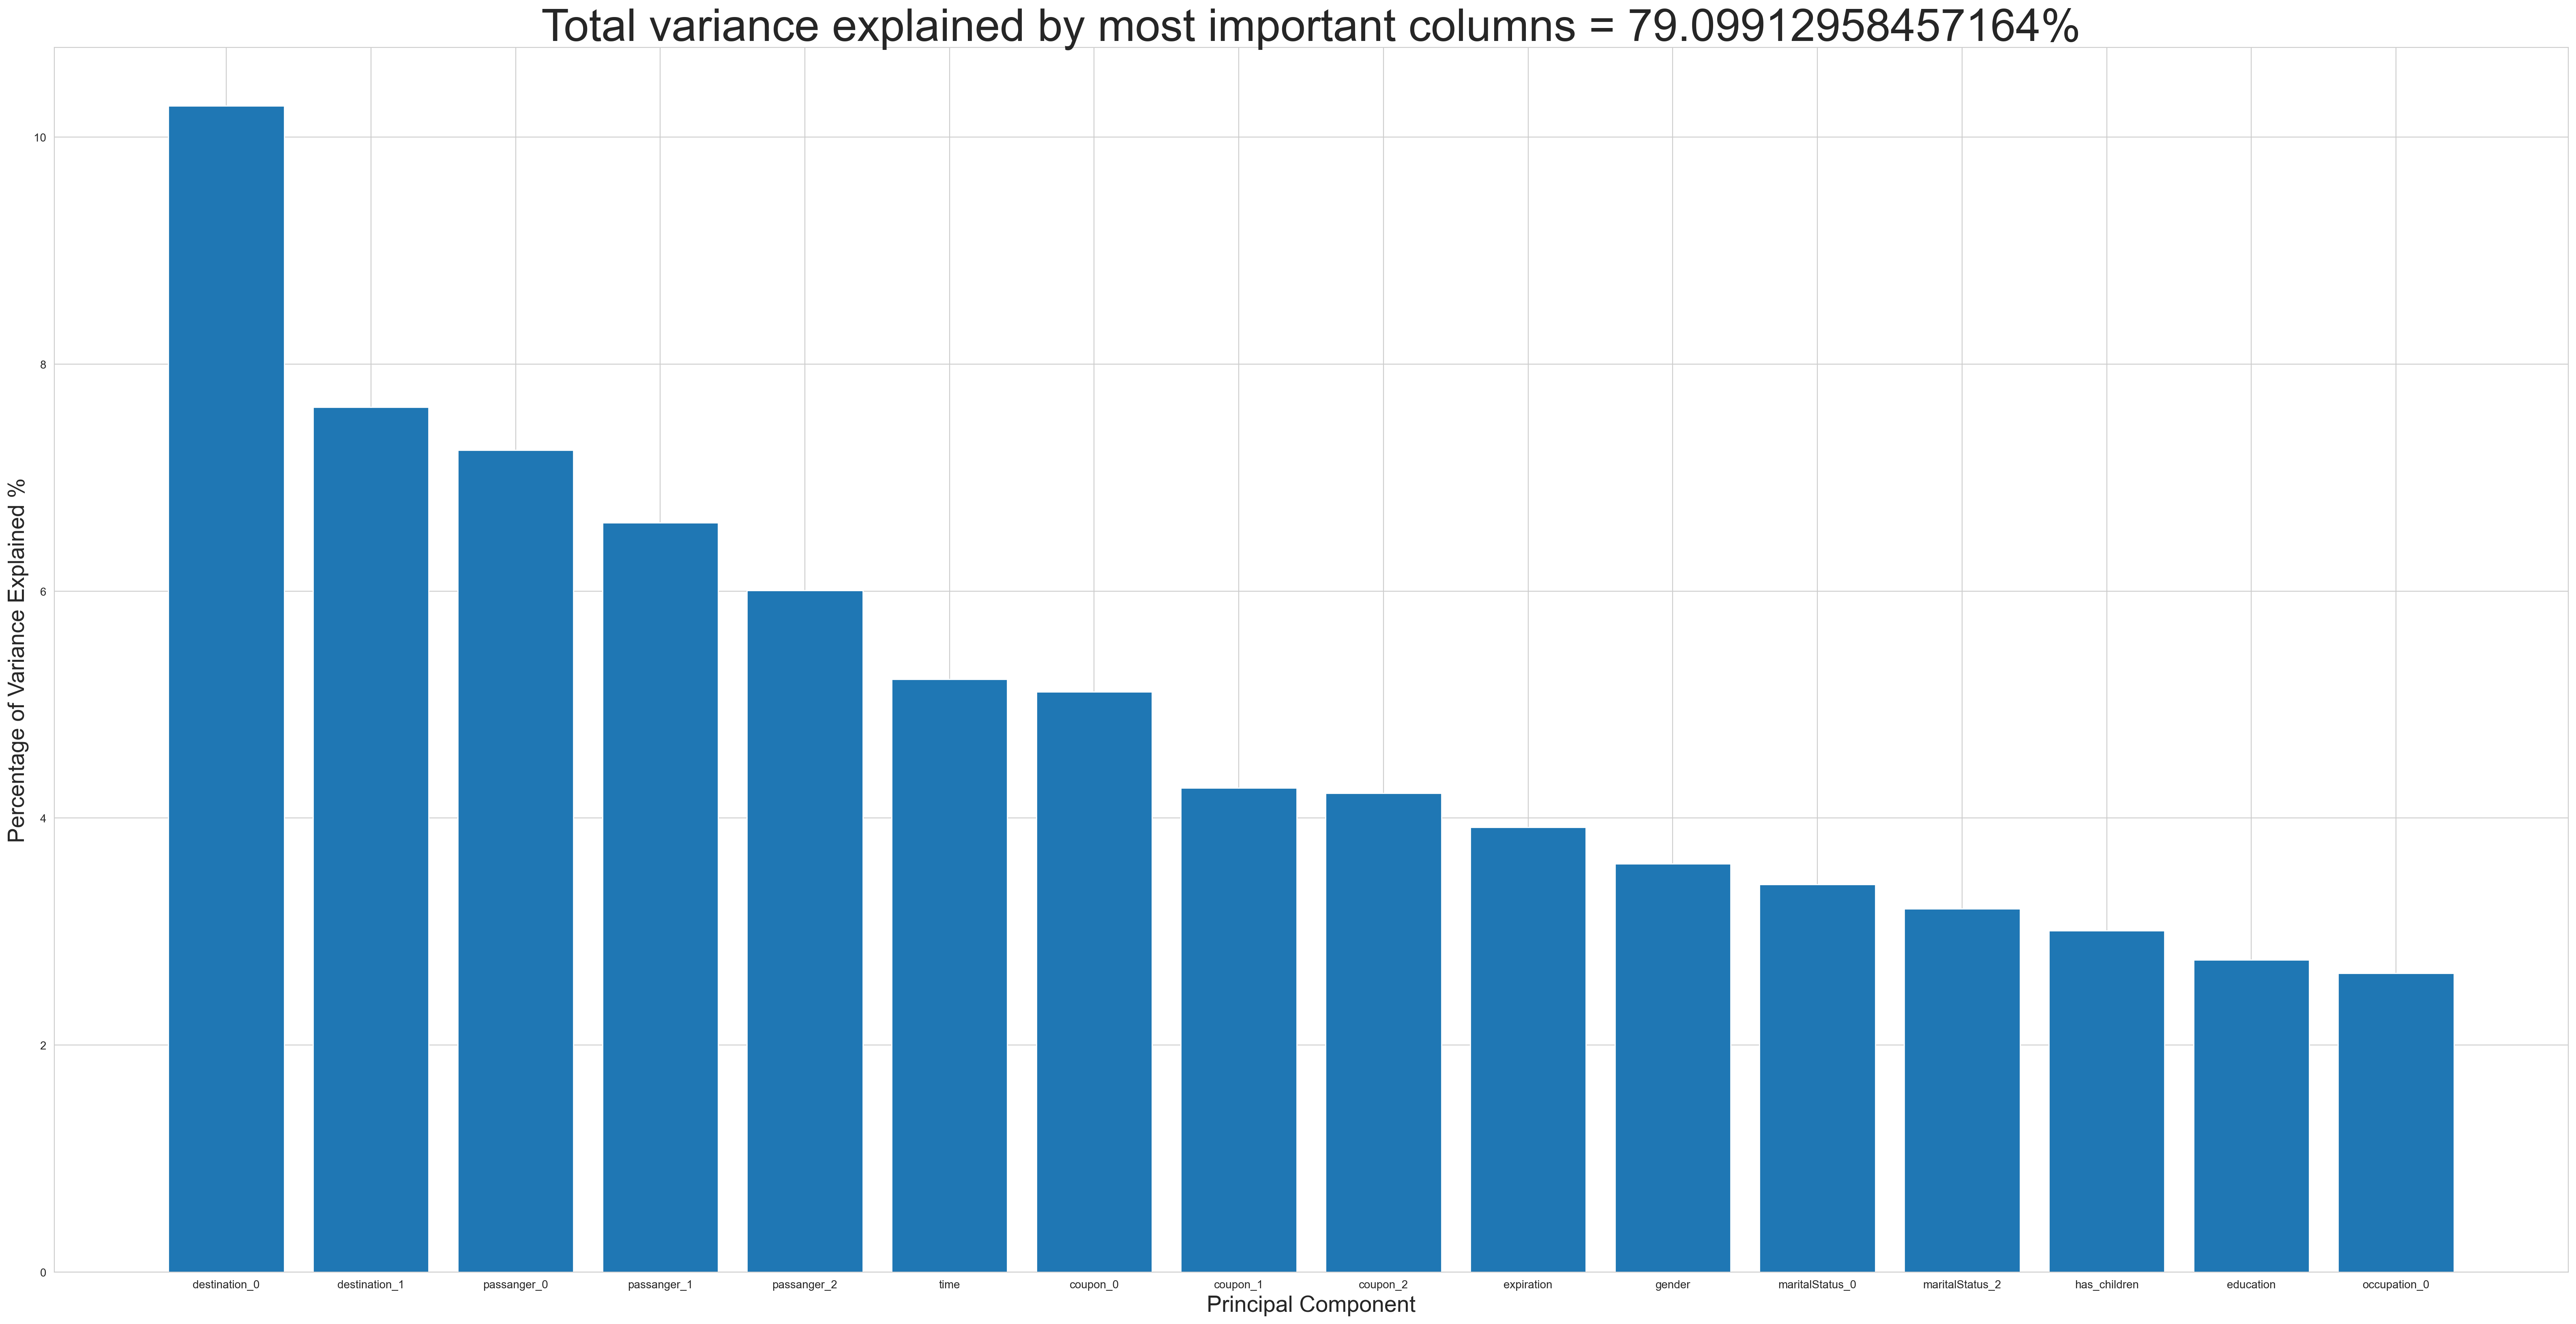

In [87]:
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams['figure.dpi'] = 200

x = value_index[:num_components_to_keep]
print(x)
plt.bar([data.columns[i] for i in x ], height=[explained_variance[i]*100 for i in x])
plt.ylabel('Percentage of Variance Explained %',fontsize=20)
plt.xlabel('Principal Component',fontsize=20)
plt.title(f"Total variance explained by most important columns = {sum([explained_variance[i] for i in x])*100}%",fontsize=40)
plt.show()

 

# <span style="color:#053CA0">Conclusion  </span>



Avec la PCA Manuelle les colonnes qui influent le plus sur la décision d'accepter ou de rejeter sont 

In [88]:
[data.columns[i] for i in x ]

['destination_0',
 'destination_1',
 'passanger_0',
 'passanger_1',
 'passanger_2',
 'time',
 'coupon_0',
 'coupon_1',
 'coupon_2',
 'expiration',
 'gender',
 'maritalStatus_0',
 'maritalStatus_2',
 'has_children',
 'education',
 'occupation_0']